# 3. Function graph as a manifold

This notebook is part of the [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

The graph
$$Γ(f)=\{(x, f(x))\in R^{m+n}: x ∈ U  \},$$

for a smooth function $f : U → R^{m}$ and an open subset $U\subset R^n$  is a simple example of a smooth manifold having an atlas with a single chart 

$$(Γ( f ), φ ),\quad \phi: (x, f (x)) \to x,\quad x\in U.$$


<br>

### One-dimensional function graph as a manifold

<br>

Since we don't use any predefined charts or transitions in this case, we can use general manifold (not the Euclidean space as previously).

<br>

**Example 3.1**

Here we use an open interval $(0,2\pi)$:

In [2]:
J = manifolds.OpenInterval(0, 2*pi)  # open interval J as manifold
c.<t>=J.chart()                      # chart on J

First we plot $U=(0,2\pi)$  as a subset of $R^2$  defined as $x(t)=t,\quad y(t)=0.$

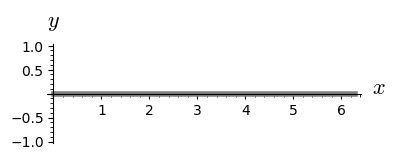

In [3]:
R2 = Manifold(2, 'R^2')             # manifold R^2
X.<x,y> = R2.chart()                # chart on R^2
                                    # F1: J -> R^2 :
F1 = J.continuous_map(R2,{(c, X):[t,0]}, name='F1')
                                    # plot c
p1=c.plot(X,mapping=F1,thickness=4,color='grey')
p1.show(figsize=[4,3])              # show plot

And next the image of $U$ under sinus function as a subset of $R^2$.

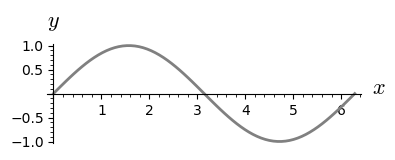

In [4]:
                                    # continuous map x=t,y=sin(t):
F2 = J.continuous_map(R2, {(c, X): [t,sin(t)]}, name='F2')
p=c.plot(X,mapping=F2,color='grey',thickness=2) # plot image of J
p.show(figsize=[4,3])                           # under F2

<br>

**Example 3.2**

Below, we map the same open interval into $R^3$.

In [5]:
# continuation
po1={'thickness':5,'color':'darkblue'}         # param.
po2={'fontsize':20,'color':'black'}

ax =line3d([(0,0,0), (1+0.15,0,0)], **po1)     # axes
ax+=line3d([(0,0,0), (0,1+0.15,0)], **po1)
ax+=line3d([(0,0,0), (0,0,6.28+0.15)], **po1)
ax+=text3d("x",(1.25,0,0),**po2)
ax+=text3d("y",(0,1.25,0),**po2)
ax+=text3d("z",(0.,0.,6.9),**po2)

In [6]:
J=manifolds.OpenInterval(0,2*pi)  # open interval as manifold
c.<t>=J.chart()                   # chart on J
R3 = Manifold(3, 'R^3')           # manifold R^3
X.<x,y,z> = R3.chart()            # chart on R^3
                                  # F: J -> R^3:
F=J.continuous_map(R3,{(c,X):[cos(3*t),sin(3*t),t]},name='F')
p=c.plot(X,mapping=F,color='grey',thickness=3,
  plot_points=200,label_axes=False)  # plot image of J
(p+ax).show(aspect_ratio=[1,1,0.3],frame=False)  # show plot


Graphics3d Object

### Two-dimensional function graph as a manifold

<br>

**Example 3.3**

Now let $U$ be an open rectangle $(-\pi,\pi)\times (-\pi,\pi)$ in $R^2$.

In [7]:
R2 = Manifold(2, 'R^2')                  # manifold R^2
c_xy.<x,y> = R2.chart()                  # chart on R^2 
U = R2.open_subset('U',                  # open subset of R^2
    coord_def={c_xy: [x>-pi,x<pi,y>-pi,y<pi]})
c_U.<x,y>=U.chart()                      # chart on U

First we plot the coordinate lines in the set $(-\pi,\pi)\times(-\pi,\pi)$.

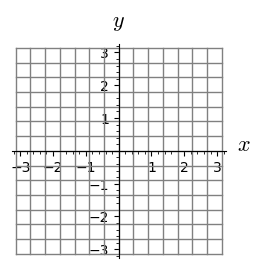

In [8]:
p=c_U.plot(number_values={x:15,y:15},color='grey')  # plot
p.show(figsize=4)                        # coordinate lines on U

The graph of the function $f(x,y)=\cos(\sqrt{x^2+y^2})$ as a subset of $R^3$:

In [9]:
R3 = Manifold(3, 'R^3')                     # manifold R^3
c_XYZ.<X,Y,Z> = R3.chart()                  # chart on R^3
F = U.continuous_map(R3,                    # F: U -> R^3
  {(c_U, c_XYZ): [x,y,cos(sqrt(x^2+y^2))]}, name='F')
                    # plot the image of coordinate lines in  U:
p1=c_U.plot(c_XYZ,mapping=F,number_values={x:15,y:15},
  color='black',thickness=2,label_axes=False)
s=plot3d(cos(sqrt(x^2+y^2)),(x,-pi,pi),(y,-pi,pi),
         color='lightgrey',opacity=0.7)     # plot  image of U                 
(p1+s).rotateZ(-pi/6).show(frame=False,aspect_ratio=[1,1,1.8]) 
                                            # show plot

Graphics3d Object

**Example 3.4**

Now we show a similar example using  polar coordinates. We need two charts in this example. If we don't use the Euclidean space, **we need to define both Cartesian and polar coordinates and also the transition map**  

$$\ \ x=r\cos\phi,\ \ y=r\sin\phi.$$

First we plot the coordinate lines $r,\phi$:

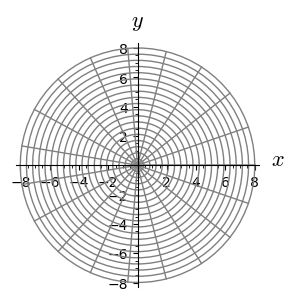

In [10]:
reset()
R2 = Manifold(2, 'R^2')                  # manifold R^2
c_cart.<x,y> = R2.chart()                # Cartesian coordinates
                    # the complement of the segment y=0 and x>=0:
U = R2.open_subset('U', coord_def={c_cart: (y!=0, x<0)}) 
c_pol.<r,ph> = U.chart(r'r:(0,+oo) ph:(0,2*pi):\phi') # polar coord.
                                         # transition map:
pol_to_cart = c_pol.transition_map(c_cart, [r*cos(ph), r*sin(ph)])
                                         # plot coordinate lines
g = c_pol.plot(c_cart,number_values={r:20,ph:20},color='grey')
g.show(figsize=[3,3])                    # show plot

And next the image of these lines as a subset of $R^3$:

In [11]:
# continuation
R3 = Manifold(3, 'R^3')                  # manifold R^3
c_XYZ.<X,Y,Z> = R3.chart()               # chart on R^3
F = U.continuous_map(R3,                 # F: U->R^3
  {(c_pol, c_XYZ): [r*cos(ph),r*sin(ph),cos(r)]}, name='F')
                     # plot images of coordinate lines in U:
p=c_pol.plot(c_XYZ,mapping=F,number_values={r:20,ph:20},
  color='black',thickness=1,label_axes=False)
                                         # plot image of U:
s=parametric_plot3d([r*cos(ph),r*sin(ph),cos(r)],
    (ph,0,2*pi),(r,0,8.1),color='lightgrey',opacity=0.5)
(p+s).show(aspect_ratio=[1,1,4],frame=False)  # show plot

Graphics3d Object

### Three dimensional function graph as a manifold

<br>

**Example 3.5**

First we show the coordinate lines $x,y,z$ in the three dimensional rectangle:

In [12]:
M = Manifold(3, 'M')                   # manifold M
c_xyz.<x,y,z> = M.chart()              # coordinates x,y,z
p1=c_xyz.plot(ranges={x:(0.1,1),y:(0.1,1),z:(0.1,1)},
    number_values={x:4,y:4,z:4},thickness=2,
    color='grey',label_axes=False)     # plot coordinate lines
p1.show(frame=False)                   # show plot
# adjust manually the figure after plot 
# (figsize does not work in 3d)

Graphics3d Object

And next the image under the map $F(x,y,z)=(x,y,(x^2+y^2)+z)$:

In [13]:
c_XYZ.<X,Y,Z> = M.chart()                 # new chart X,Y,Z
                                          # F: R^3 -> R^3
F=M.continuous_map(M,{(c_xyz,c_XYZ):[x,y,(x^2+y^2)+z]}, name='F')
                               # plot images of coordinate lines:
p=c_xyz.plot(c_XYZ,mapping=F,
    ranges={x:(0.1,1),y:(0.1,1),z:(0.1,4)},
    number_values={x:4,y:4,z:4},color='grey',
    thickness=2,label_axes=False)
p.show (aspect_ratio=[1,1,0.3],frame=False)   # show plot

Graphics3d Object

**Example 3.6**

Finally  let us show  3-dimensional example in spherical coordinates.

First we show some coordinate lines of the open set defined by: $0<r<1,\ 0<\phi<\pi/2,\  0<\theta<\pi/2,$

(the transition map $\ \ x=r\sin\theta\cos\phi,\ y=r\sin\theta\sin\phi,\ \ z=r\cos\theta\ \ $ must be defined by the user).


In [14]:
M = Manifold(3, 'R^3')               # manifold R^3
U = M.open_subset('U') # the domain of spherical coordinates
c_spher.<r,th,ph>=U.chart(r'r:(0,+oo) th:(0,pi):\theta\
ph:(0,2*pi):periodic:\phi')          # spherical coordinates
c_cart.<x,y,z> = U.chart()           # Cartesian coordinates
spher_to_cart = c_spher.transition_map(c_cart,  
[r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]) # trans.map

In [15]:
po1={'thickness':5,'color':'darkblue'}         # param.
po2={'fontsize':20,'color':'black'}

ax =line3d([(0,0,0), (1+0.35,0,0)], **po1)     # axes
ax+=line3d([(0,0,0), (0,1+0.35,0)], **po1)
ax+=line3d([(0,0,0), (0,0,1.3+0)], **po1)
ax+=text3d("x",(1.45,0,0),**po2)
ax+=text3d("y",(0,1.45,0),**po2)
ax+=text3d("z",(0.,0.,1.40),**po2)

In [16]:
                                    # plot the coordinate lines:
pp=c_spher.plot(c_cart,ranges={r:(0,1),th:(0,pi/2),ph:(0,pi/2)},
    number_values={r:2,th:10,ph:2},thickness=2,
    color={r:'red', ph:'green',th:'blue'},label_axes=False)
(pp+ax).rotateZ(pi/9).show(frame=False)   # show plot  frame=False
# adjust manually the figure after plot 

Graphics3d Object

And next the image of these lines under the mapping which triples the $\phi$ coordinate.

In [17]:
                                   # F1(r,th,ph)=(r,th,3ph)
F1 = U.continuous_map(M, {(c_spher, c_spher): [r,th,3*ph]}, 
    name='F1')                     # define F1
p1=c_spher.plot(c_cart,mapping=F1,ranges={r:(0,1),th:(0,pi/2),
    ph:(0,pi/2)},number_values={r:2,ph:2,th:10},
    color={r:'red', ph:'green',th:'blue'},
    thickness=2,label_axes=False)  # plot image of coord. lines
(p1+ax).rotateZ(3*pi/2+0.2).show(frame=False)       # show plot

Graphics3d Object

## What's next?

Take a look at the notebook [Spheres as manifolds](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/04Manifold_Spheres.ipynb).